-10.528


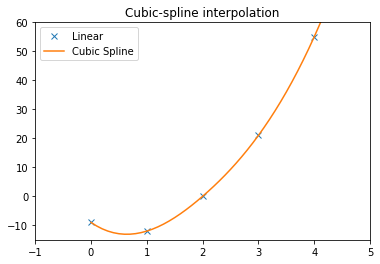

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import *
from scipy.interpolate import PPoly, splrep
from scipy.interpolate import CubicSpline
x =[0,1,2,3,4]
y =[-9,-12,0,21,55]
cs=CubicSpline(x,y)
xnew=np.arange(0,5,0.1)
print(cs(1.2))

plt.plot(x, y, 'x', xnew, cs(xnew))
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1, 5, -15, 60])
plt.title('Cubic-spline interpolation')
plt.show()


In [3]:
y = [-9,-12,0,21,55]
x =[0,1,2,3,4]
xvals = np.arange(0,5,0.1)
func = splrep(x, y, s=0)
yvals = splev(1.2, func, der=0)
print(func)
pp=PPoly.from_spline(func)


(array([ 0.,  0.,  0.,  0.,  2.,  4.,  4.,  4.,  4.]), array([ -9.        , -17.88888889,  -4.33333333,  26.55555556,
        55.        ,   0.        ,   0.        ,   0.        ,   0.        ]), 3)


In [4]:
def cubic_spline(x, y):
    """
    Parameters
    ----------
    x  : list of floats
    y  : list of floats
    
    Returns
    -------  
    list of list of floats
    """
    n = len(x) - 1
    h = [x[i+1]-x[i] for i in range(n)]
    al = [3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]) for i in range(1,n)]
    al.insert(0,0)
    l = [1] * (n+1)
    u = [0] * (n+1)
    z = [0] * (n+1)
    for i in range(1, n):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (al[i] - h[i-1]*z[i-1])/l[i]
        
    b = [0] * (n+1)
    c = [0] * (n+1)
    d = [0] * (n+1)
    for i in range(n-1, -1, -1):    #for i in reversed(range(n)):
        c[i] = z[i] - u[i]*c[i+1]
        b[i] = (y[i+1]-y[i])/h[i] - h[i]*(c[i+1] + 2*c[i])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    return [y, b, c, d]


[[-9, -12, 0, 21, 55], 
[-6.6071428571428577, 4.2142857142857144, 16.75, 27.785714285714285, 0],
[0.0, 10.821428571428571, 1.7142857142857144, 9.3214285714285712, 0], 
[3.6071428571428572, -3.035714285714286, 2.5357142857142856, -3.1071428571428572, 0]]
[a[0][i] +  a[1][i]*(xs[i][k]-i) + a[2][i]*(xs[i][k]-i)**2 + a[3][i]*(xs[i][k]-i)**3   

In [68]:
def printfx(cbsp):
    d=0.0
    c=0.0
    b=0.0
    a=0.0
    for i  in range(0,len(cbsp)):
                    d=cbsp[0][i]
                    c=cbsp[1][i]    
                    b=cbsp[2][i]
                    a=cbsp[3][i]
                    print( '{: >+5.6f}( x - {: d})^3{: >+5.4f}( x - {: d} )^2{: >+5.4f}( x - {: d} ){: >+5.4f}'.format(a,i,b,i,c,i,d) )

+3.607143( x -  0)^3+0.0000( x -  0 )^2-6.6071( x -  0 )-9.0000
-3.035714( x -  1)^3+10.8214( x -  1 )^2+4.2143( x -  1 )-12.0000
+2.535714( x -  2)^3+1.7143( x -  2 )^2+16.7500( x -  2 )+0.0000
-3.107143( x -  3)^3+9.3214( x -  3 )^2+27.7857( x -  3 )+21.0000
4


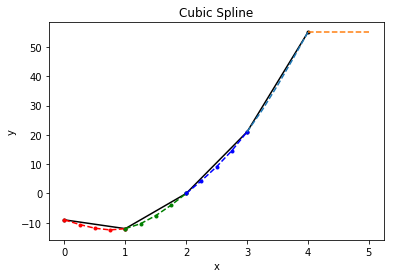

In [72]:
###### import math  
import matplotlib.pyplot as plt
import numpy as np

  # the function to be interpolated
def f(x):
    return math.e ** x
    
# input
interval = 3
#x = [i for i in range(interval + 1)]
#y = [f(i) for i in range(interval + 1)]
x=np.arange(5)

y=[-9,-12,0,21,55]
# process
a = cubic_spline(x, y)
printfx(a)
print(len(a))
# prepare data for plotting the splines
points_per_interval = 5
xs = []
ys = []
for i in range(len(x)):
    xs.append(np.linspace(i, i+1, points_per_interval))
    ys.append([a[0][i] + 
               a[1][i]*(xs[i][k]-i) + 
               a[2][i]*(xs[i][k]-i)**2 + 
               a[3][i]*(xs[i][k]-i)**3   
               for k in range(points_per_interval)])
    
# prepare data for plotting the given function
#x = np.linspace(0, 5, interval * points_per_interval - (interval - 1))
#y = [f(x[i]) for i in range(len(x))]
x=np.arange(5)
y=[-9,-12,0,21,55]

plt.plot(x, y, 'k.-', xs[0], ys[0], 'r.--', xs[1], ys[1], 'g.--', xs[2], ys[2], 'b.--',xs[3],ys[3],'--',xs[4],ys[4],'--')
#plt.plot(x,y,'k-',xs,ys,'r--')
plt.title('Cubic Spline')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

# cubic spline interpolation
# author : worasait suwannik
# date   : apr 2015

